### *This notebook includes only the complete datasets for samples with EPMA, SIMS and LA-ICP-MS data*

In [1]:
# import modules
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine.data import diamonds
from matplotlib.cm import get_cmap
import sklearn
import random
from random import sample
import scipy.stats as st
import re
import distinctipy
import Thermobar

In [2]:
# import the melt inclusion data. no whole rock data to be read in just yet but this can be found in the same spreadsheet

data = pd.read_excel('/Users/ollie/Documents/Cambridge_2020/Earth_Sciences/LA-ICP-MS/mar23/MI averages and ICPMS data.xlsx', sheet_name='MI_epma_laicpms_py')

In [3]:
data.Ba

0     666.0
1     645.0
2     712.0
3     706.0
4     640.0
5     612.0
6     665.0
7     730.0
8     821.0
9     714.0
10    759.0
11    685.0
12    780.0
13    710.0
14    669.0
15    624.0
16    671.0
17    666.0
18    612.0
19    624.0
20    550.0
21    730.0
22    590.0
23    668.0
24    704.0
25    718.0
26    764.0
27    738.0
28    665.0
29    661.0
30    660.0
31    736.0
32    718.0
33    693.0
34    694.0
35    725.0
36    740.0
37    719.0
38    706.0
39    696.0
40    666.0
41      NaN
42      NaN
43      NaN
44      NaN
Name: Ba, dtype: float64

### Plotting the major element from probe of samples with complete EPMA, SIMS, Laser

In [4]:
# loading published yasur data
# importing natural data vanuatu:
full_df = pd.read_excel('~/Documents/Cambridge_2020/Earth_Sciences/Databases/Vanuatu_WR_MI_mgcorr.xlsx', sheet_name='van_geochem')

# convert all to floats
full_df.iloc[:,14:29]= full_df.iloc[:,14:29].astype(float)
# normlaise anhydrous total
tot = full_df.Total
dfnorm = 100* full_df.iloc[:,14:26].div(tot, axis=0)

# Replace original oxide data with the normalised data
full_df.iloc[:,14:26] = dfnorm.values
vandat = full_df
vandat['Mg num'] = 100 * ((vandat['MgO']/40.31) / ((vandat['MgO']/40.31)+(vandat['FeOt']/71.844)))

#add total alkalis column: 
vandat['SiO2_LI'] = vandat['SiO2']/3
vandat['totalk'] = vandat['Na2O']+vandat['K2O']
vandat['LI'] = (vandat['SiO2_LI']+vandat['K2O'])-(vandat['CaO']+vandat['MgO']+vandat['FeO'])

# screen for yasur
yas_dat = (vandat[vandat.Island == 'Yasur'])
yas_dat.columns
yas_dat.Host.unique()

array([nan, 'ol', 'plag', 'cpx', 'apatite'], dtype=object)

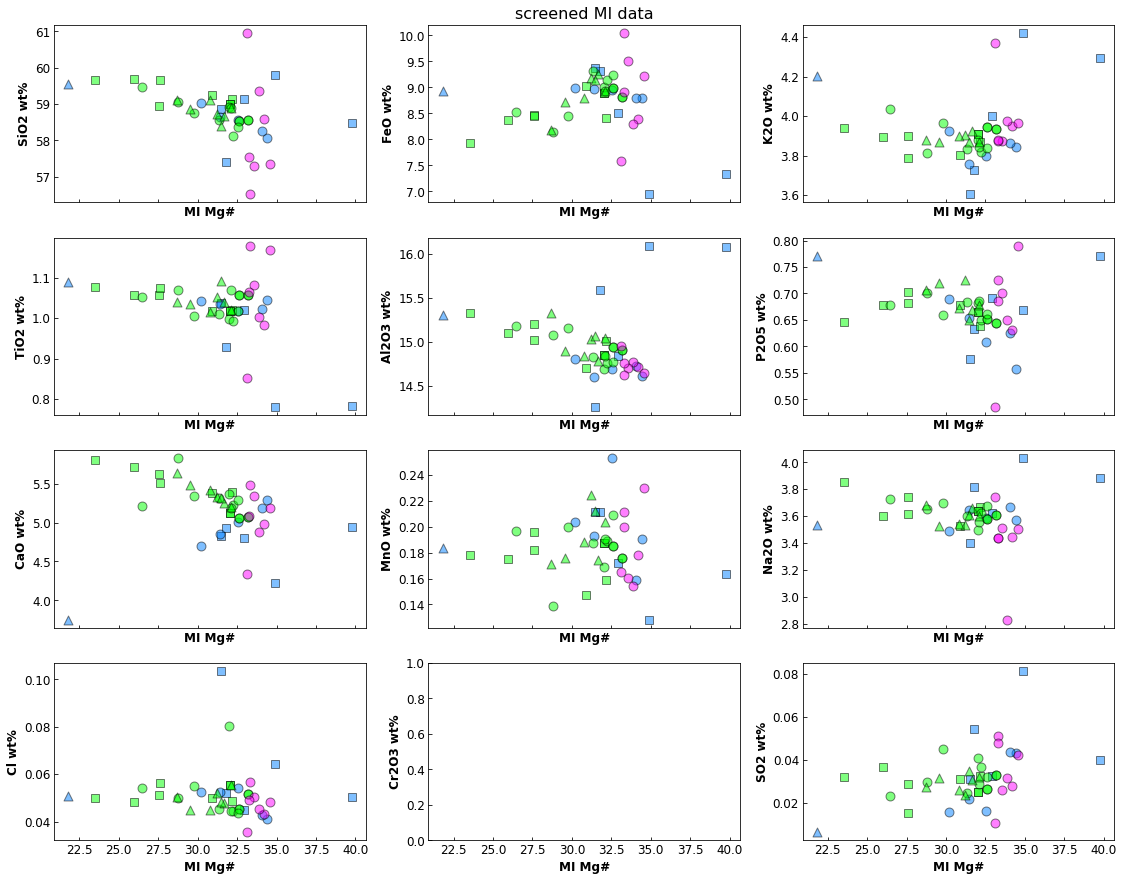

In [5]:
fig, ax = plt.subplots(4,3, sharex = True)
fig.set_figheight(15)
fig.set_figwidth(19)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

scalarMap2 = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}#dict(zip(data, colors))
min_dict = {'T1_scoria':'^','T2_scoria':'o','T3_scoria':'s', 'glass':'X'}

for i in data.Min_Host.unique():
    df_dat = data[data.Min_Host == i]
    for j in data['Sample_grouped'].unique():
        df_min = df_dat[df_dat.Sample_grouped == j]
        
        x = df_min['Mg_num']
        ax[0,0].scatter(x, df_min['SiO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[0,1].scatter(x, df_min['FeO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[0,2].scatter(x, df_min['K2O'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,0].scatter(x, df_min['TiO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,1].scatter(x, df_min['Al2O3'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,2].scatter(x, df_min['P2O5'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,0].scatter(x, df_min['CaO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,1].scatter(x, df_min['MnO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,2].scatter(x, df_min['Na2O'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,0].scatter(x, df_min['Cl'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
       # ax[3,1].scatter(x, df_min['Cr2O3'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,2].scatter(x, df_min['SO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        



    
ax = ax.flatten()
for i in range(12):
    ax[i].tick_params(axis='both', which='both', labelsize=12, direction='in')
    #ax[i].set_xlim(1,3)
    ax[i].set_xlabel('MI Mg#', fontsize=12,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=12, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeO wt%', fontsize=12, weight='bold')
        ax[i].set_title('screened MI data',fontsize = 16)
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=12, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=12, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=12, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=12, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=12, weight='bold')
    if i == 7:
        ax[i].set_ylabel('MnO wt%', fontsize=12, weight='bold')
    if i == 8:
        ax[i].set_ylabel('Na2O wt%', fontsize=12, weight='bold')
    if i == 9:
        ax[i].set_ylabel('Cl wt%', fontsize=12, weight='bold')
    if i == 10:
        ax[i].set_ylabel('Cr2O3 wt%', fontsize=12, weight='bold')
    if i == 11:
        ax[i].set_ylabel('SO2 wt%', fontsize=12, weight='bold')


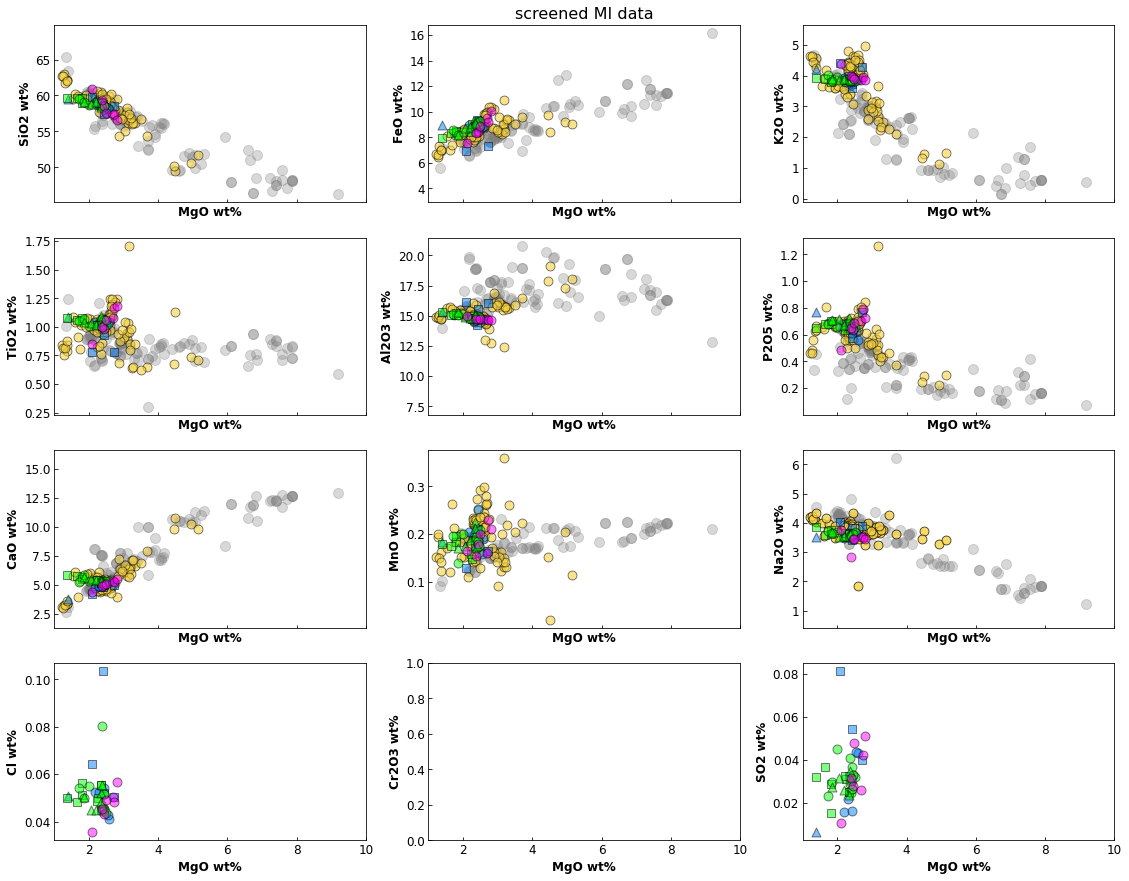

In [6]:
fig, ax = plt.subplots(4,3, sharex = True)
fig.set_figheight(15)
fig.set_figwidth(19)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

scalarMap2 = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}#dict(zip(data, colors))
min_dict = {'T1_scoria':'^','T2_scoria':'o','T3_scoria':'s', 'glass':'X'}

for i in data.Min_Host.unique():
    df_dat = data[data.Min_Host == i]
    for j in data['Sample_grouped'].unique():
        df_min = df_dat[df_dat.Sample_grouped == j]
        
        x = df_min['MgO']
        ax[0,0].scatter(x, df_min['SiO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k', s=80, label=i,zorder=3)
        ax[0,1].scatter(x, df_min['FeO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[0,2].scatter(x, df_min['K2O'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,0].scatter(x, df_min['TiO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,1].scatter(x, df_min['Al2O3'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,2].scatter(x, df_min['P2O5'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,0].scatter(x, df_min['CaO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,1].scatter(x, df_min['MnO'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,2].scatter(x, df_min['Na2O'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,0].scatter(x, df_min['Cl'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
       # ax[3,1].scatter(x, df_min['Cr2O3'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,2].scatter(x, df_min['SO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        

# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['o', 'o', 'o']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
ax[0,0].scatter(x, df_wr['SiO2'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[0,1].scatter(x, df_wr['FeOt'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[0,2].scatter(x, df_wr['K2O'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['TiO2'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[1,1].scatter(x, df_wr['Al2O3'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[1,2].scatter(x, df_wr['P2O5'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')         
ax[2,0].scatter(x, df_wr['CaO'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[2,1].scatter(x, df_wr['MnO'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')         
ax[2,2].scatter(x, df_wr['Na2O'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
#ax[3,0].scatter(x, df_wr['NiO'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
#ax[3,1].scatter(x, df_wr['Cr2O3'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')
#ax[3,2].scatter(x, df_wr['SO2'], color='grey', marker='o', s=100, alpha=0.5, zorder=1, label='WR')         
#ax[2,2].legend()

#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    ax[0,0].scatter(x, dfhost['SiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(x, dfhost['FeOt'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,2].scatter(x, dfhost['K2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['TiO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(x, dfhost['Al2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,2].scatter(x, dfhost['P2O5'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['CaO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(x, dfhost['MnO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,2].scatter(x, dfhost['Na2O'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    #ax[3,0].scatter(x, dfhost['NiO'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    #ax[3,1].scatter(x, dfhost['Cr2O3'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    #ax[3,2].scatter(x, dfhost['SO2'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.8, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    #ax[2,2].legend(fontsize=12)

    
ax = ax.flatten()
for i in range(12):
    ax[i].tick_params(axis='both', which='both', labelsize=12, direction='in')
    ax[i].set_xlim(1,10)
    ax[i].set_xlabel('MgO wt%', fontsize=12,weight='bold')
    if i == 0:
        ax[i].set_ylabel('SiO2 wt%', fontsize=12, weight='bold')
    if i == 1:
        ax[i].set_ylabel('FeO wt%', fontsize=12, weight='bold')
        ax[i].set_title('screened MI data',fontsize = 16)
    if i == 2:
        ax[i].set_ylabel('K2O wt%', fontsize=12, weight='bold')
    if i == 3:
        ax[i].set_ylabel('TiO2 wt%', fontsize=12, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Al2O3 wt%', fontsize=12, weight='bold')
    if i == 5:
        ax[i].set_ylabel('P2O5 wt%', fontsize=12, weight='bold')
    if i == 6:
        ax[i].set_ylabel('CaO wt%', fontsize=12, weight='bold')
    if i == 7:
        ax[i].set_ylabel('MnO wt%', fontsize=12, weight='bold')
    if i == 8:
        ax[i].set_ylabel('Na2O wt%', fontsize=12, weight='bold')
    if i == 9:
        ax[i].set_ylabel('Cl wt%', fontsize=12, weight='bold')
    if i == 10:
        ax[i].set_ylabel('Cr2O3 wt%', fontsize=12, weight='bold')
    if i == 11:
        ax[i].set_ylabel('SO2 wt%', fontsize=12, weight='bold')

        

### h2o, co2, Cl and S against MgO and SiO2. 

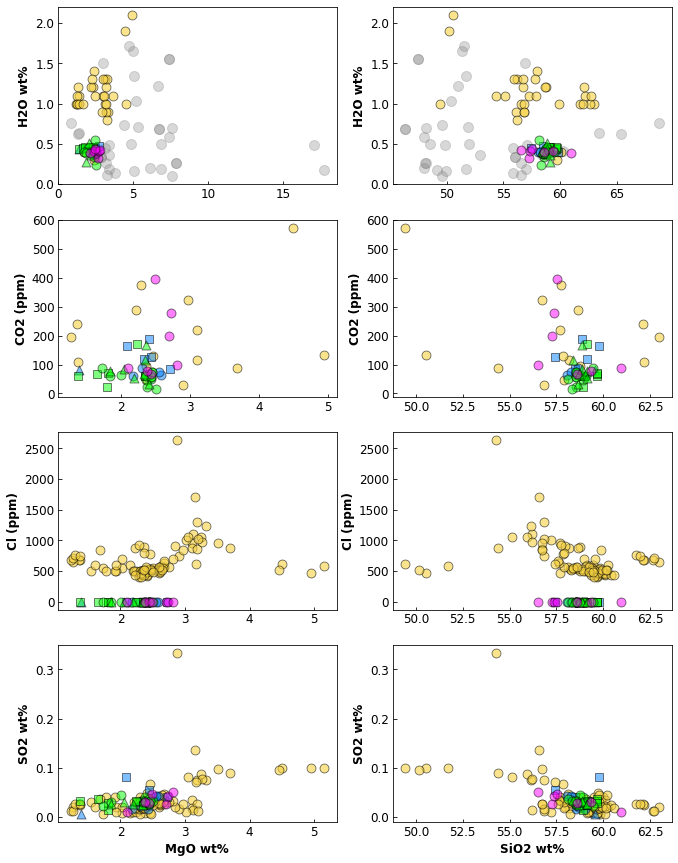

In [113]:
fig, ax = plt.subplots(4,2, sharey = False)
fig.set_figheight(15)
fig.set_figwidth(11)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

scalarMap2 = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}#dict(zip(data, colors))
min_dict = {'T1_scoria':'^','T2_scoria':'o','T3_scoria':'s', 'glass':'X'}

for i in data.Min_Host.unique():
    df_dat = data[data.Min_Host == i]
    for j in data['Sample_grouped'].unique():
        df_min = df_dat[df_dat.Sample_grouped == j]
        
        x = df_min['MgO']
        xx = df_min['SiO2']
        ax[0,0].scatter(x, df_min['H2O wt% SIMS'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k', s=80, label=i,zorder=3)
        ax[0,1].scatter(xx, df_min['H2O wt% SIMS'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,0].scatter(x, df_min['CO2 ppm SIMS'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[1,1].scatter(xx, df_min['CO2 ppm SIMS'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,0].scatter(x, df_min['Cl'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[2,1].scatter(xx, df_min['Cl'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,0].scatter(x, df_min['SO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
        ax[3,1].scatter(xx, df_min['SO2'], color=scalarMap2[i], marker=min_dict[j],alpha=0.5, edgecolor='k',s=80, label=i,zorder=3)
      

# Natural data           
# Construct symbol dictionary for MI hosts
host = ['ol', 'cpx', 'plag']
symb = ['o', 'o', 'o']
symbmap = dict(zip(host, symb))

df_wr = (yas_dat[yas_dat.Data_Type == 'WR'])

x = df_wr['MgO']
xx = df_wr['SiO2']
ax[0,0].scatter(x, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[0,1].scatter(xx, df_wr['H2O+'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[1,0].scatter(x, df_wr['CO2 (ppm)'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[1,1].scatter(xx, df_wr['CO2 (ppm)'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[2,0].scatter(x, df_wr['Cl (ppm)'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[2,1].scatter(xx, df_wr['Cl (ppm)'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')         
ax[3,0].scatter(x, df_wr['SO2/S wt%'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')
ax[3,1].scatter(xx, df_wr['SO2/S wt%'], color='grey', marker='o', s=100, alpha=0.3, zorder=1, label='WR')         


#plotting MI data
for i in host: 
    df0 = vandat[vandat['Island']=='Yasur']
    dfhost = df0[df0['Host'] == i]
    x = dfhost['MgO']
    xx = dfhost['SiO2']
    ax[0,0].scatter(x, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[0,1].scatter(xx, dfhost['H2O+'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,0].scatter(x, dfhost['CO2 (ppm)'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[1,1].scatter(xx, dfhost['CO2 (ppm)'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,0].scatter(x, dfhost['Cl (ppm)'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[2,1].scatter(xx, dfhost['Cl (ppm)'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,0].scatter(x, dfhost['SO2/S wt%'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    ax[3,1].scatter(xx, dfhost['SO2/S wt%'], color='#f5d142',marker=symbmap[i],s=80,alpha=0.6, linewidths=0.8, edgecolors='black', label=i, zorder=2)
    

    
ax = ax.flatten()
for i in range(8):
    ax[i].tick_params(axis='both', which='both', labelsize=12, direction='in')
       
    if i == 0:
        ax[i].set_ylabel('H2O wt%', fontsize=12, weight='bold')
    if i == 1:
        ax[i].set_ylabel('H2O wt%', fontsize=12, weight='bold')
        
    if i == 2:
        ax[i].set_ylabel('CO2 (ppm)', fontsize=12, weight='bold')
    if i == 3:
        ax[i].set_ylabel('CO2 (ppm)', fontsize=12, weight='bold')
    if i == 4:
        ax[i].set_ylabel('Cl (ppm)', fontsize=12, weight='bold')
    if i == 5:
        ax[i].set_ylabel('Cl (ppm)', fontsize=12, weight='bold')
    if i == 6:
        ax[i].set_ylabel('SO2 wt%', fontsize=12, weight='bold')
        ax[i].set_xlabel('MgO wt%', fontsize=12,weight='bold')
    if i == 7:
        ax[i].set_ylabel('SO2 wt%', fontsize=12, weight='bold')
        ax[i].set_xlabel('SiO2 wt%', fontsize=12,weight='bold')




        

### Filter 1: compare major element data for epma and laicpms

 March 27th - have not dropped any data yet

In [7]:
# run outside so doesnt reset eachtime
samp_color = dict(zip(data.Sample_sims.unique(), distinctipy.get_colors(45)))
# by sample_grouped
scalarMap_ol_2 = {'T1_scoria': (0.0, 1.0, 0.0), 'T2_scoria': (1.0, 0.0, 1.0), 'T3_scoria': (0.0, 0.5, 1.0)}
# by sample_grouped
min_dict_ol = {'ol': 'o', 'plag': 's', 'cpx': 'D'} 

Text(0.5, 0, 'MgO wt% (EPMA)')

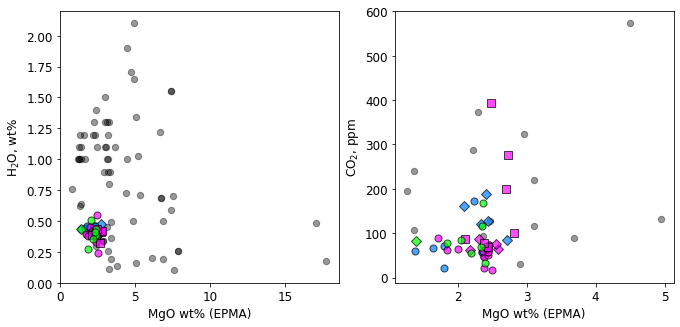

In [8]:
# quick plot of H2O and CO2 in un-PEC data.

fig, ax = plt.subplots(1,2, sharex = False)
fig.set_figheight(5)
fig.set_figwidth(11)

for i in data['Sample_grouped'].unique():
    df = data[data.Sample_grouped == i]
    for j in df['Min_Host'].unique():
        df_host = df[df.Min_Host == j]
        
        ax[0].scatter(df_host['MgO'], df_host['H2O wt% SIMS'], color=scalarMap_ol_2[i], marker=min_dict_ol[j],alpha=0.7, edgecolor='k',s=50,label=i, zorder=2)
        ax[1].scatter(df_host['MgO'], df_host['CO2 ppm SIMS'], color=scalarMap_ol_2[i], marker=min_dict_ol[j],alpha=0.7, edgecolor='k',s=50,label=i, zorder=2)
        #ax[1].legend(title='Sample Name')

        
# import literature data
ax[0].scatter(yas_dat['MgO'], yas_dat['H2O+'], c='k',s=40,alpha=0.4, linewidths=1, edgecolors='k', label='published', zorder=1)
ax[1].scatter(yas_dat['MgO'], yas_dat['CO2 (ppm)'], c='k',s=40,alpha=0.4, linewidths=1, edgecolors='k', label='published', zorder=1)

ax[0].set_ylabel('H$_2$O, wt%',fontsize=12)
ax[1].set_ylabel('CO$_2$, ppm',fontsize=12)
ax[0].set_xlabel('MgO wt% (EPMA)',fontsize=12)
ax[1].set_xlabel('MgO wt% (EPMA)',fontsize=12)
#ax[i].tick_params(axis='both', which='both', labelsize=12, direction='in')


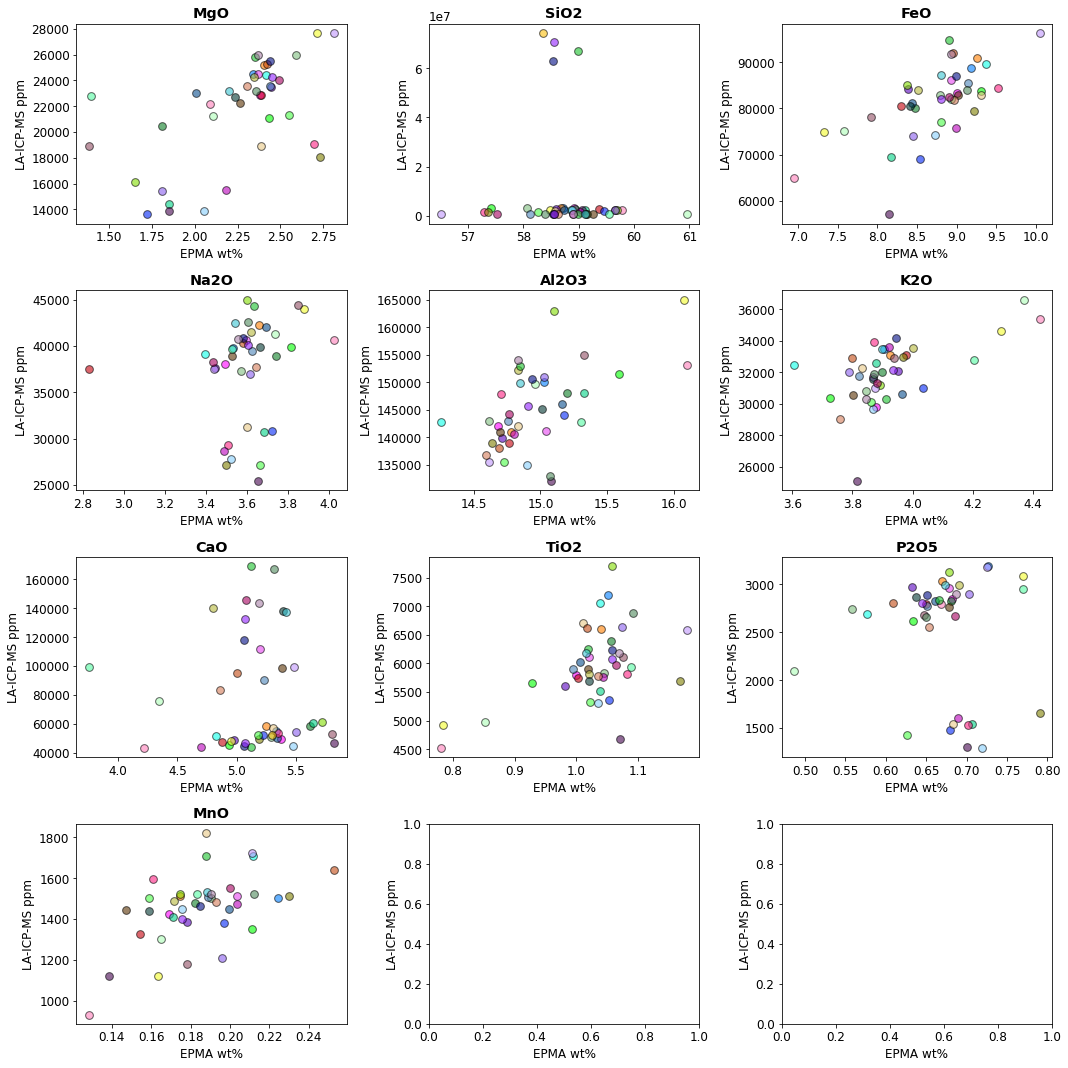

In [9]:
# Plotting Data
fig, ax = plt.subplots(4,3, sharex = False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.rcParams["font.family"] ="sans-serif" 
plt.rcParams["font.size"] = 12

for i in data.Sample_sims.unique():
    dat = data[data.Sample_sims == i]
    
    ax[0,0].scatter(dat.MgO, dat['Mg'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[0,1].scatter(dat.SiO2, dat['Si29_CPS'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[0,2].scatter(dat.FeO, dat['Fe'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])

    ax[1,0].scatter(dat.Na2O, dat['Na'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[1,1].scatter(dat.Al2O3, dat['Al'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[1,2].scatter(dat.K2O, dat['K'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])

    ax[2,0].scatter(dat.CaO, dat['Ca'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[2,1].scatter(dat.TiO2, dat['Ti'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])
    ax[2,2].scatter(dat.P2O5, dat['P'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=data['Sample_sims'])

    ax[3,0].scatter(dat.MnO, dat['Mn'], color=samp_color[i],alpha=0.6, edgecolor='k',s=60, label=i)
    #ax[3,0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


ax = ax.flatten()
for i in range(12):
    ax[i].set_xlabel('EPMA wt%', fontsize=12)
    ax[i].set_ylabel('LA-ICP-MS ppm', fontsize=12)
for i in [0]:
    ax[i].set_title('MgO', weight='bold')
for i in [1]:
    ax[i].set_title('SiO2', weight='bold')
for i in [2]:
    ax[i].set_title('FeO', weight='bold')
for i in [3]:
    ax[i].set_title('Na2O', weight='bold')
for i in [4]:
    ax[i].set_title('Al2O3', weight='bold')
for i in [5]:
    ax[i].set_title('K2O', weight='bold')
for i in [6]:
    ax[i].set_title('CaO', weight='bold')
for i in [7]:
    ax[i].set_title('TiO2', weight='bold')
for i in [8]:
    ax[i].set_title('P2O5', weight='bold')
for i in [9]:
    ax[i].set_title('MnO', weight='bold')

plt.tight_layout()

### Filter 2: plot metals versus MgO wt% and Mg#

Plotting each metal on a seperate graph

Colour by sample id

In [11]:
data.SO2

0     0.054600
1     0.040800
2     0.023800
3     0.031000
4     0.043200
5     0.027900
6     0.031850
7     0.015267
8     0.081400
9     0.031400
10    0.040300
11    0.032167
12    0.036933
13    0.028900
14    0.045400
15    0.031800
16    0.027650
17    0.026350
18    0.042400
19    0.023500
20    0.029900
21    0.024800
22    0.043700
23    0.016000
24    0.031267
25    0.036900
26    0.006500
27    0.032050
28    0.010800
29    0.051450
30    0.022100
31    0.016400
32    0.032767
33    0.032600
34    0.025325
35    0.035000
36    0.026033
37    0.026767
38    0.028700
39    0.032933
40    0.047950
41    0.025325
42    0.026767
43    0.032200
44    0.032933
Name: SO2, dtype: float64

In [89]:
# Calculate metal ratios of interest
data['V/Sc'] = data['V'] / data['Sc']
data['Sr/Y'] = data['Sr'] / data['Y']
data['Ba/Nb'] = data['Ba'] / data['Nb']
data['Cu/Au'] = (data['Cu']) / (data['Au'])
data['Cu/MgO'] = data['Cu'] / data['MgO']
data['Cu/S'] = data['Cu'] / (data['SO2']*10000) 
data['H2O/Ce'] = data['H2O wt% SIMS'] / (data['Ce']) 
data['logCe'] = np.log(data['Ce'])

In [90]:
data[['Ba','Ba/Nb']].head()

data.columns[58:120] 

Index(['Si29_CPS', 'Si29_CPS_Int2SE', 'IntStdWv', 'IntStdWv_Int2SE', 'Li',
       'Li_ppm_m7_Int2SE', 'Be', 'Be_ppm_m9_Int2SE', 'Na', 'Na_ppm_m23_Int2SE',
       'Mg', 'Mg_ppm_m24_Int2SE', 'Al', 'Al_ppm_m27_Int2SE', 'P',
       'P_ppm_m31_Int2SE', 'K', 'K_ppm_m39_Int2SE', 'Ca', 'Ca_ppm_m43_Int2SE',
       'Sc', 'Sc_ppm_m45_Int2SE', 'Ti', 'Ti_ppm_m49_Int2SE', 'V',
       'V_ppm_m51_Int2SE', 'Cr', 'Cr_ppm_m53_Int2SE', 'Mn',
       'Mn_ppm_m55_Int2SE', 'Fe', 'Fe_ppm_m56_Int2SE', 'Co',
       'Co_ppm_m59_Int2SE', 'Ni', 'Ni_ppm_m60_Int2SE', 'Cu',
       'Cu_ppm_m65_Int2SE', 'Zn', 'Zn_ppm_m66_Int2SE', 'Rb',
       'Rb_ppm_m85_Int2SE', 'Sr', 'Sr_ppm_m88_Int2SE', 'Y', 'Y_ppm_m89_Int2SE',
       'Zr', 'Zr_ppm_m90_Int2SE', 'Nb', 'Nb_ppm_m93_Int2SE', 'Mo',
       'Mo_ppm_m95_Int2SE', 'Sn', 'Sn_ppm_m118_Int2SE', 'Sb',
       'Sb_ppm_m121_Int2SE', 'Cs', 'Cs_ppm_m133_Int2SE', 'Ba',
       'Ba_ppm_m137_Int2SE', 'La', 'La_ppm_m139_Int2SE'],
      dtype='object')

In [91]:
data.to_excel('trace-metal-output.xlsx')

In [92]:
data.columns[58:] #transpose from this onwards

data_piv = pd.melt(data, id_vars=data.columns[:58], value_vars =data.columns[58:]).rename(columns = {'variable': 'metal', 'value': 'ppm'}, inplace = False)
data_piv[data_piv.metal.isin(['Ba'])]

,Sample_sims,Unnamed: 0,SiO2 wt% SIMS,MgO wt% SIMS vols,H2O wt% SIMS,CO2 ppm SIMS,FeO,SiO2,CaO,TiO2,...,Time,Duration(s),Comments,Total points,Selection type,Components,File,Reference Standard,metal,ppm
2610,m2_T3c4_m1,9.50,57.410100,2.404369,0.443054,127.236319,9.307300,57.410100,4.932500,0.927600,...,13:42:36.340000,11.1690,M2_T3c4_m1,19,Normal,1,Batch3_16Mar23,Ca,Ba,666.0
2611,m3_T2o25_m1,73.00,58.910100,2.373009,0.435447,47.090366,9.010800,58.910100,5.374500,0.999000,...,13:44:55.230000,23.0080,M3_T2o25_m1,38,Normal,1,Batch3_16Mar23,Ca,Ba,645.0
2612,m3_T1o3_m1,58.00,58.722400,2.356131,0.386085,67.795051,9.182900,58.722400,5.330000,1.051100,...,13:47:13.950000,11.8950,M3_T1o3_m1,20,Normal,1,Batch3_16Mar23,Ca,Ba,712.0
2613,m3_T1o3_m2,59.50,58.681700,2.383482,0.384158,32.854590,9.252250,58.681700,5.253000,1.039550,...,13:49:48.890000,9.1019,M3_T1o3_m2,15,Normal,1,Batch3_16Mar23,Ca,Ba,706.0
2614,m4_T2c1_m5,85.00,58.067500,2.540190,0.397639,64.896377,8.792900,58.067500,5.295000,1.045000,...,13:52:05.890000,8.1498,M4_T2c1_m5,14,Normal,1,Batch3_16Mar23,Ca,Ba,640.0
2615,m4_T2p28_m2,124.50,58.597200,2.440450,0.404562,67.999534,8.393050,58.597200,4.976550,0.982150,...,13:55:51.110000,23.1150,M4_T2p28_m2,38,Normal,1,Batch3_16Mar23,Ca,Ba,612.0
2616,m4_T2p28_m4small,126.50,59.369350,2.372450,0.411133,77.455778,8.302150,59.369350,4.873700,1.001700,...,13:58:30.510000,20.2020,M4_T2p28_m4,34,Normal,1,Batch3_16Mar23,Ca,Ba,665.0
2617,m2_T3o3_m2_embay,41.00,58.941200,1.818393,0.444412,22.450191,8.473867,58.941200,5.622433,1.056467,...,15:41:55.670000,8.1601,M2_T3o3_m2,13,Normal,1,Batch4_16Mar23,Ca,Ba,730.0
2618,m2_T3c16_m1,2.50,59.788350,3.229184,0.403189,162.367660,6.946750,59.788350,4.215750,0.780750,...,15:44:16.150000,20.8670,M2_T3c16_m1,35,Normal,1,Batch4_16Mar23,Ca,Ba,821.0
2619,m2_T3c15_m1,1.00,58.859600,2.407342,0.440079,187.218790,9.366700,58.859600,4.823500,1.038700,...,15:46:33.400000,12.0450,M2_T3c15_m1,20,Normal,1,Batch4_16Mar23,Ca,Ba,714.0


In [93]:
# drop rows where ppm is below detection limit

row_drop = data_piv.loc[((data_piv['ppm'] == 'Below LOD'))]
row_drop_lst = row_drop.index.to_list()
data_piv = data_piv.drop(row_drop_lst)

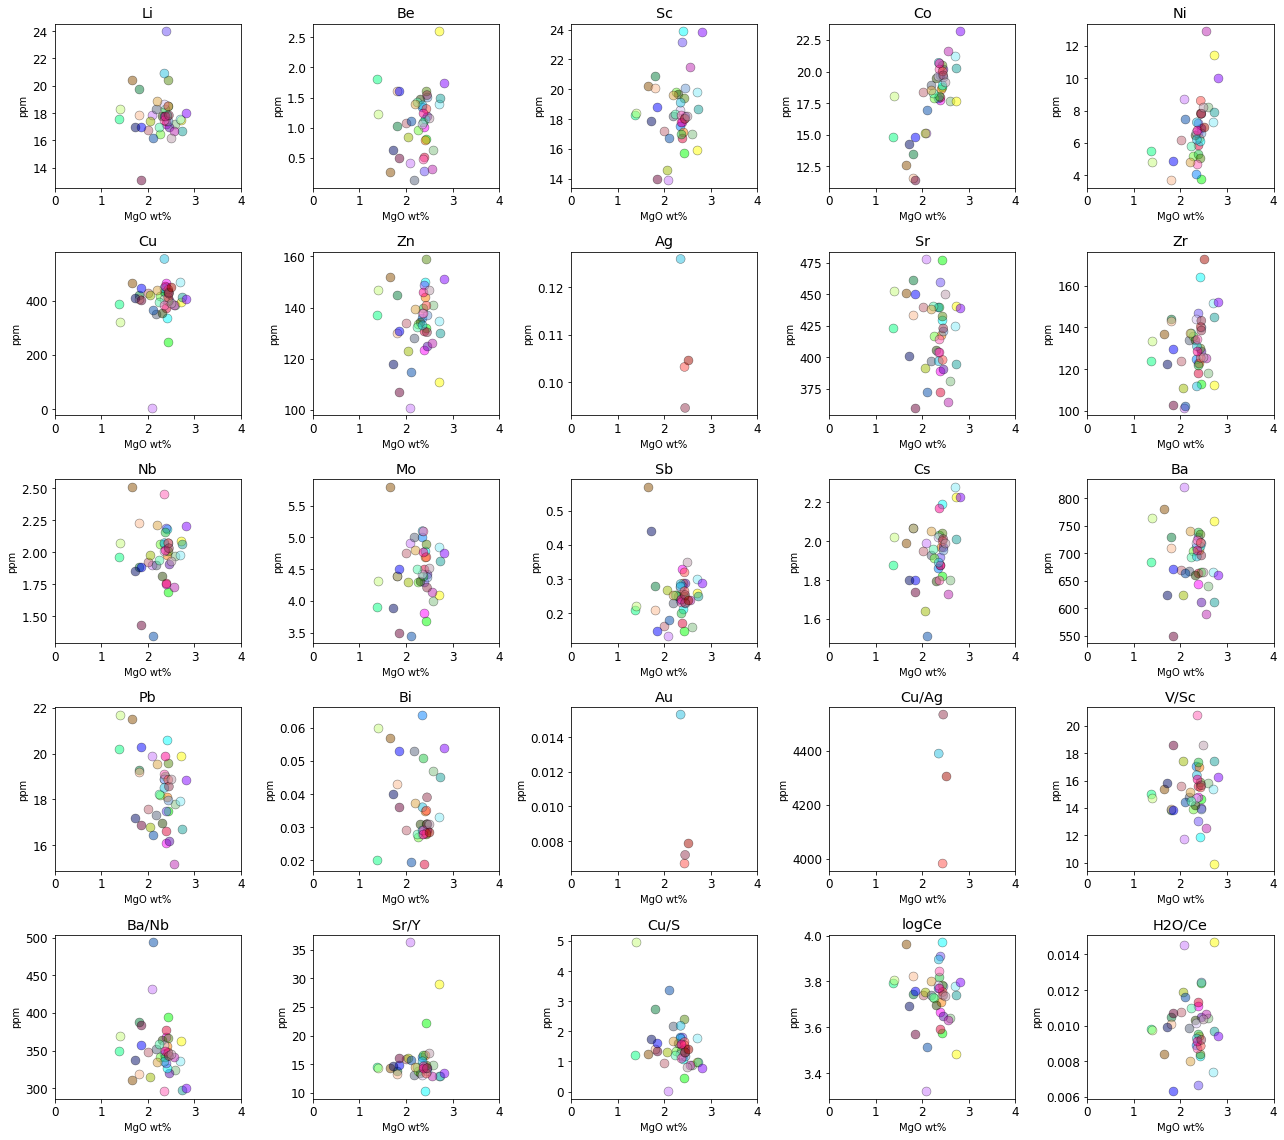

In [94]:
fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(18)

category = ['Li','Be','Sc', 'Co', 'Ni', 'Cu','Zn', 'Ag',
           'Sr', 'Zr', 'Nb', 'Mo', 'Sb', 'Cs', 'Ba', 'Pb'
           , 'Bi', 'Au', 'Cu/Ag', 'V/Sc', 'Ba/Nb','Sr/Y', 'Cu/S', 'logCe', 'H2O/Ce']

subcat = data_piv.Sample_sims.unique()
numbers = list(range(1,27))
sub = zip(category, numbers)
samp_color = dict(zip(data_piv.Sample_sims.unique(), distinctipy.get_colors(45)))

for c,num in sub:
    df_metal = data_piv[data_piv.metal ==c]
    ax = fig.add_subplot(5,5,num)
    
    for i in subcat:
        df_subcat = df_metal[df_metal['Sample_sims'] == i]
        x = df_subcat['MgO']
        y = df_subcat['ppm']
        ax.scatter(x, y, c=df_subcat['Sample_sims'].map(samp_color),marker='o',s=80,alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
        ax.set_title(c)
        ax.set_xlim(0,4)
        ax.set_xlabel('MgO wt%', fontsize=10)
        ax.set_ylabel('ppm', fontsize=10)
plt.tight_layout()


Compared to Jenner (2015 and16?) and Chiaradia (2019, NatGeo) at a given MgO wt%, my samples are incredibly rich in Cu. 

Idea to replicate their plots and overlay my data. 
Read their interpretation 

replicate ifgure 3 Jenner 2015

#### *Now plotting per crystal sample*

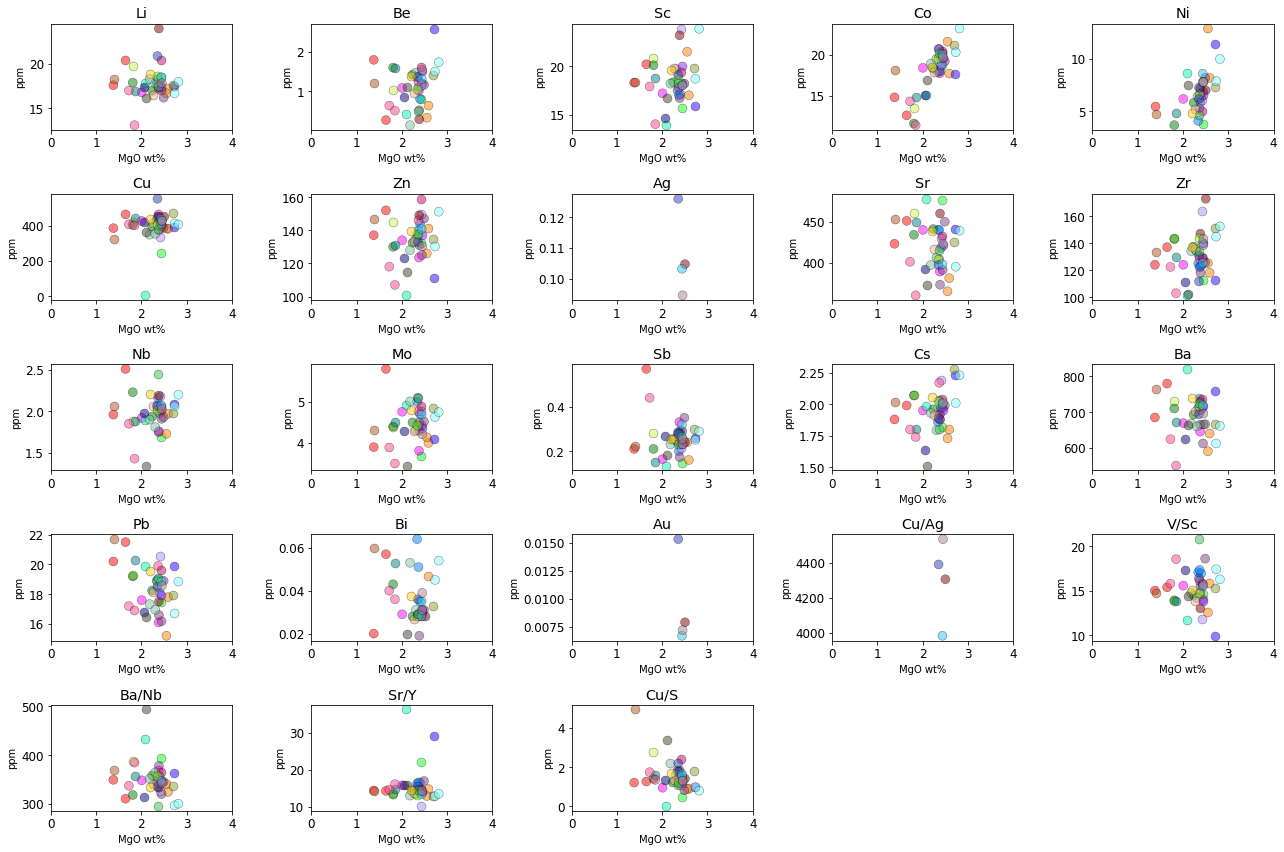

In [34]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(18)

subcat = data_piv.Sample.unique()
numbers = list(range(1,25))
sub = zip(category, numbers)
samp_color = dict(zip(data_piv.Sample.unique(), distinctipy.get_colors(45)))

for c,num in sub:
    df_metal = data_piv[data_piv.metal ==c]
    ax = fig.add_subplot(5,5,num)
    
    for i in subcat:
        df_subcat = df_metal[df_metal['Sample'] == i]
        x = df_subcat['MgO']
        y = df_subcat['ppm']
        ax.scatter(x, y, c=df_subcat['Sample'].map(samp_color),marker='o',s=80,alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
        ax.set_title(c)
        ax.set_xlim(0,4)
        ax.set_xlabel('MgO wt%', fontsize=10)
        ax.set_ylabel('ppm', fontsize=10)
plt.tight_layout()


### Filter 3: projections by MI size

#### *Now plotting per sample group*

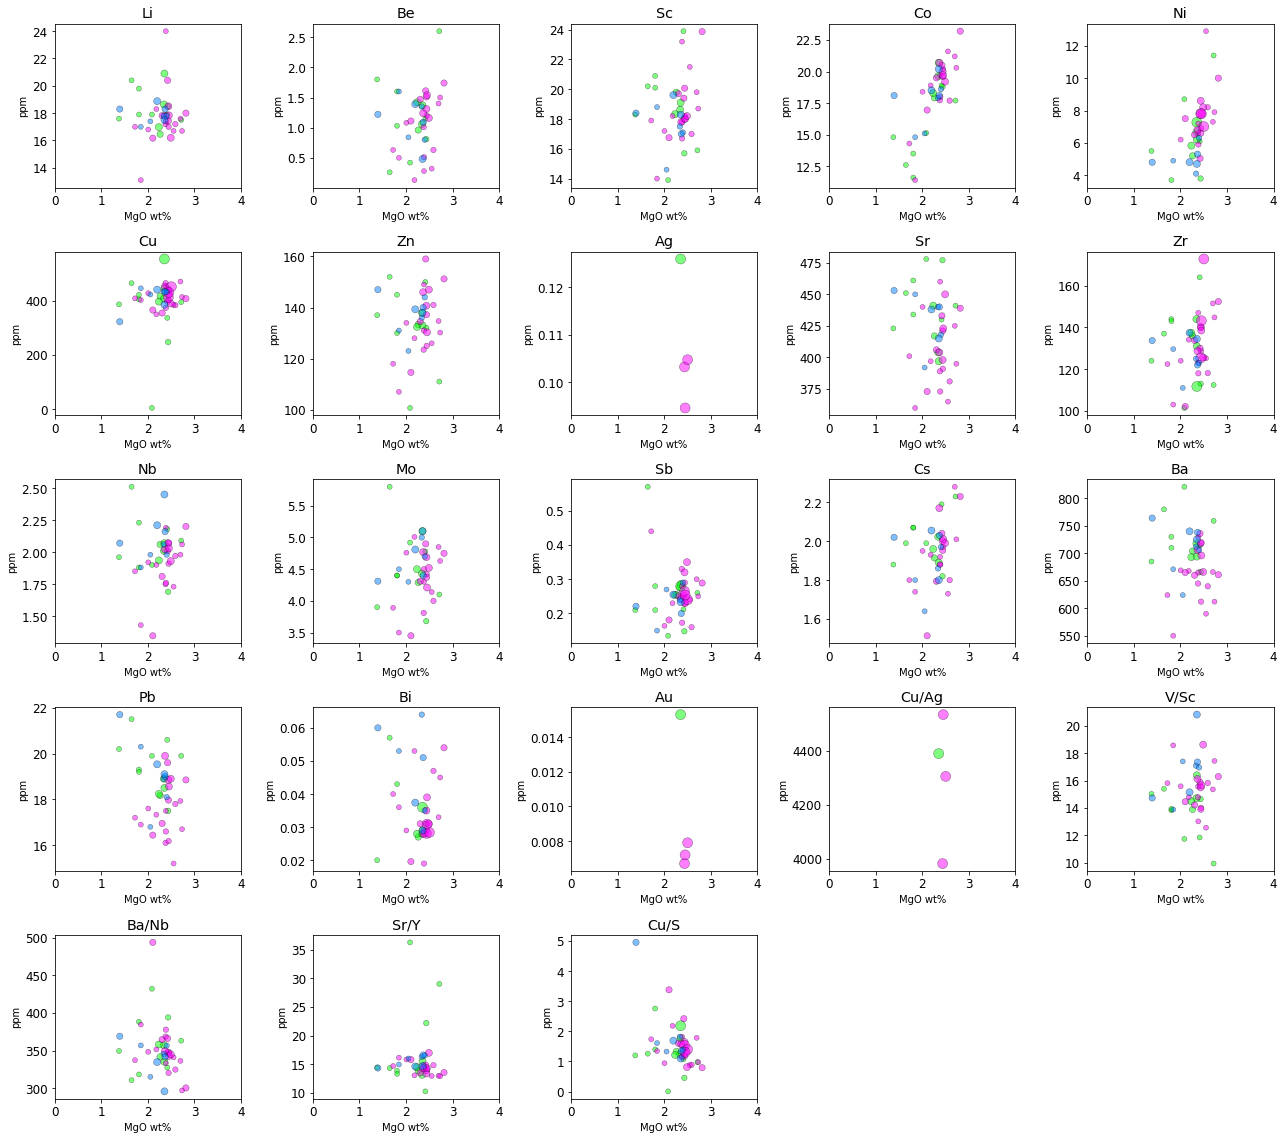

In [35]:
fig = plt.figure()
fig.set_figheight(16)
fig.set_figwidth(18)

subcat = data_piv.Sample_grouped.unique()
numbers = list(range(1,25))
sub = zip(category, numbers)
samp_color = dict(zip(data_piv.Sample_grouped.unique(), distinctipy.get_colors(3)))

for c,num in sub:
    df_metal = data_piv[data_piv.metal ==c]
    ax = fig.add_subplot(5,5,num)
    
    for i in subcat:
        df_subcat = df_metal[df_metal['Sample_grouped'] == i]
        x = df_subcat['MgO']
        y = df_subcat['ppm']
        ax.scatter(x, y, c=df_subcat['Sample_grouped'].map(samp_color),marker='o',s=df_subcat['MI size'],alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
        ax.set_title(c)
        ax.set_xlim(0,4)
        ax.set_xlabel('MgO wt%', fontsize=10)
        ax.set_ylabel('ppm', fontsize=10)
plt.tight_layout()

### Filter 4: projections by host minerals

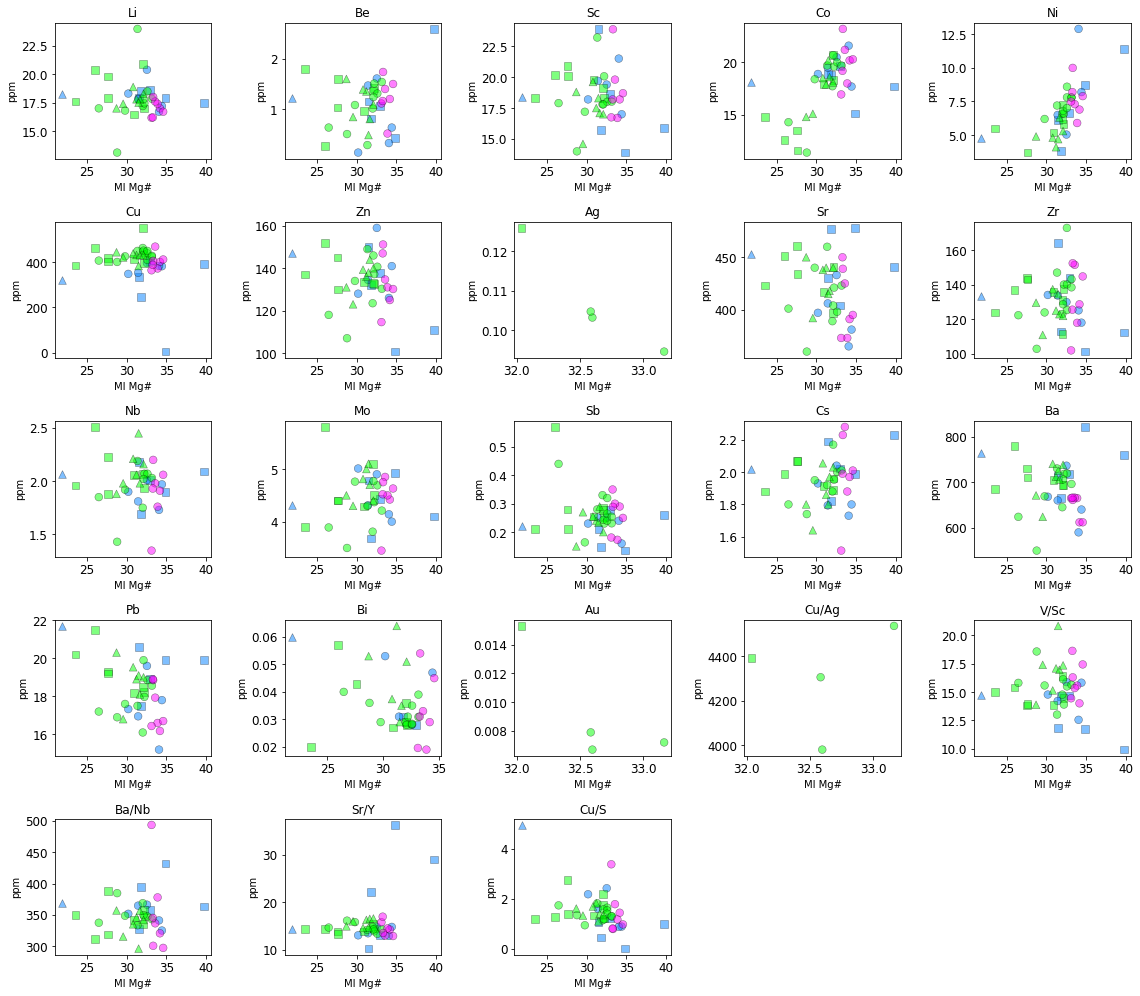

In [36]:
fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(16)


subcat = data_piv.Min_Host.unique()
subsubcat = data_piv.Sample_grouped.unique()
numbers = list(range(1,25))
sub = zip(category, numbers)
samp_color = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}
samp_shape = {'T1_scoria':'^','T2_scoria':'o','T3_scoria':'s'}

for c,num in sub:
    df_metal = data_piv[data_piv.metal ==c]
    ax = fig.add_subplot(5,5,num)
    for i in subcat:
        df_subcat = df_metal[df_metal['Min_Host'] == i]
        for j in subsubcat:
            df_fin = df_subcat[df_subcat['Sample_grouped'] == j]
            x = df_fin['Mg_num']
            y = df_fin['ppm']
            ax.scatter(x, y, c=df_fin['Min_Host'].map(samp_color),marker=samp_shape.get(j),s=60,alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
            ax.set_title(c, fontsize=12,font='sans serif')
            #ax.set_xlim(1,3)
            ax.set_xlabel('MI Mg#', fontsize=10)
            ax.set_ylabel('ppm', fontsize=10)

plt.tight_layout()

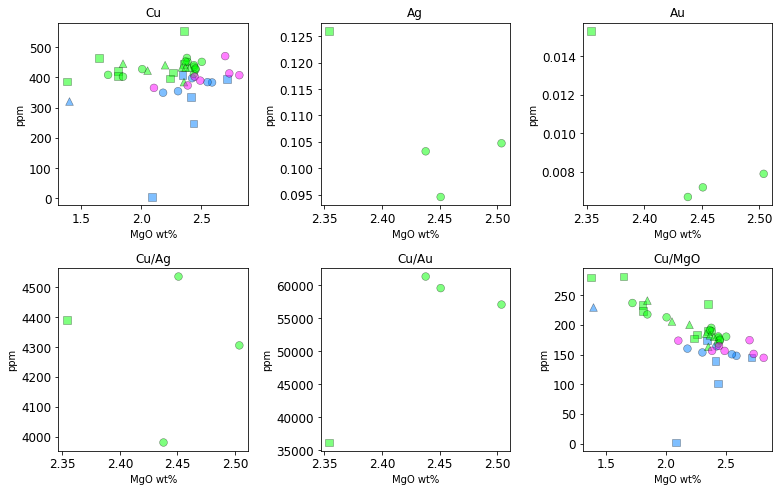

In [37]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(11)

category = [ 'Cu','Ag','Au', 'Cu/Ag', 'Cu/Au', 'Cu/MgO']

subcat = data_piv.Min_Host.unique()
subsubcat = data_piv.Sample_grouped.unique()
numbers = list(range(1,21))
sub = zip(category, numbers)
samp_color = {'ol': (0.0, 1.0, 0.0), 'plag': (1.0, 0.0, 1.0), 'cpx': (0.0, 0.5, 1.0)}
samp_shape = {'T1_scoria':'^','T2_scoria':'o','T3_scoria':'s'}

for c,num in sub:
    df_metal = data_piv[data_piv.metal ==c]
    ax = fig.add_subplot(2,3,num)
    for i in subcat:
        df_subcat = df_metal[df_metal['Min_Host'] == i]
        for j in subsubcat:
            df_fin = df_subcat[df_subcat['Sample_grouped'] == j]
            x = df_fin['MgO']
            y = df_fin['ppm']
            ax.scatter(x, y, c=df_fin['Min_Host'].map(samp_color),marker=samp_shape.get(j),s=60,alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
            ax.set_title(c, fontsize=12,font='sans serif')
            #ax.set_xlim(1,3)
            ax.set_xlabel('MgO wt%', fontsize=10)
            ax.set_ylabel('ppm', fontsize=10)

plt.tight_layout()

### Overlay with Vanuatu datasets

In [38]:
# importing natural data vanuatu:
full_df = pd.read_excel('~/Documents/Cambridge_2020/Earth_Sciences/Databases/Vanuatu_WR_MI_mgcorr.xlsx', sheet_name='van_geochem')

# convert all to floats
full_df.iloc[:,14:29]= full_df.iloc[:,14:29].astype(float)
# normlaise anhydrous total
tot = full_df.Total
dfnorm = 100* full_df.iloc[:,14:26].div(tot, axis=0)

# Replace original oxide data with the normalised data
full_df.iloc[:,14:26] = dfnorm.values
vandat = full_df
vandat['Mg num'] = 100 * ((vandat['MgO']/40.31) / ((vandat['MgO']/40.31)+(vandat['FeOt']/71.844)))

#add total alkalis column: 
vandat['SiO2_LI'] = vandat['SiO2']/3
vandat['totalk'] = vandat['Na2O']+vandat['K2O']
vandat['LI'] = (vandat['SiO2_LI']+vandat['K2O'])-(vandat['CaO']+vandat['MgO']+vandat['FeO'])

# screen for yasur
yas_dat = (vandat[vandat.Island == 'Yasur'])
yas_dat.columns
yas_dat.Host.unique()

array([nan, 'ol', 'plag', 'cpx', 'apatite'], dtype=object)

In [39]:
full_df.iloc[:,14:29]

,SiO2,TiO2,Al2O3,FeOt,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,Cr2O5,Total,Mg#
0,48.401412,0.699158,12.303810,10.153088,NaN,11.283717,0.182131,12.893095,11.194986,2.004648,1.229363,0.222693,NaN,100.313232,69.355909
1,49.683372,0.886274,15.866719,10.249280,NaN,11.390620,0.171052,6.123060,11.233992,2.785938,1.689037,0.279382,NaN,99.464737,51.568284
2,49.014620,0.735888,13.765543,9.759439,NaN,10.846231,0.170424,10.284208,10.877333,2.238035,1.148823,0.216520,NaN,100.186743,65.255115
3,47.403740,0.604071,10.097711,9.999365,NaN,11.112875,0.185155,18.289618,9.533204,1.599692,0.987209,0.170550,NaN,99.870835,76.525505
4,47.351784,1.190784,15.863966,11.257780,NaN,12.511424,0.199629,6.916600,13.016039,2.280761,0.928586,0.224486,NaN,99.131552,52.267504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,51.030835,0.696719,13.374428,9.212516,7.816025,1.551674,0.135632,8.367261,13.697538,2.258451,1.195279,NaN,0.030227,96.437772,NaN
1062,51.071014,0.675317,14.575447,10.226967,8.787530,1.599392,0.167221,7.920198,12.591611,2.084874,0.687351,NaN,0.000000,96.399105,NaN
1063,50.977925,0.678117,13.087377,9.015569,7.614841,1.556382,0.129111,8.223373,14.592321,2.145106,1.146545,NaN,0.004393,96.428798,NaN
1064,51.041023,0.594040,11.136387,8.236260,6.896234,1.488935,0.112548,9.091446,16.905375,1.918505,0.931375,NaN,0.031882,96.491797,NaN


In [58]:
#import yasur metal data
metal_yas = pd.read_excel('~/Documents/Cambridge_2020/Earth_Sciences/Databases/Vanuatu_WR_MI_mgcorr.xlsx', sheet_name='Yasur_pubtraces')

In [59]:
metal_yas.iloc[0:18,14:29]

,SiO2,TiO2,Al2O3,FeOt,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,Total,Mg#,Host #
0,55.53,0.95,15.85,8.503110,NaN,9.45,0.16,2.63,5.43,3.67,3.13,0.53,99.06,35.541914,NaN
1,55.65,0.85,15.83,8.530104,NaN,9.48,0.17,4.10,7.37,3.62,2.64,0.43,100.44,46.145937,NaN
2,55.59,0.82,16.20,8.539102,NaN,9.49,0.17,4.03,7.09,3.57,2.61,0.41,99.98,45.692111,NaN
3,56.84,0.87,16.14,7.999222,NaN,8.89,0.16,3.00,6.54,3.84,2.93,0.47,100.54,40.069110,NaN
4,58.59,0.94,15.10,7.801266,NaN,8.67,0.16,2.68,5.50,3.95,3.38,0.54,100.03,37.981734,NaN
5,55.85,0.70,18.77,6.928460,NaN,7.70,0.14,2.36,7.47,3.85,2.53,0.42,99.63,37.781559,NaN
6,54.53,0.65,19.46,6.478560,NaN,7.20,0.12,2.13,7.93,3.87,2.39,0.38,98.60,36.953070,NaN
7,55.26,0.87,16.37,8.098200,NaN,9.00,0.16,2.95,6.52,3.81,2.96,0.48,99.15,39.372261,NaN
8,56.39,0.84,16.30,8.026216,NaN,8.92,0.16,2.86,6.36,3.87,2.94,0.50,99.14,38.847051,NaN
9,56.39,0.85,16.16,8.008220,NaN,8.90,0.16,2.83,6.25,3.87,2.96,0.50,98.92,38.650053,NaN


In [60]:
# normlaise anhydrous total
tot_met = metal_yas.Total.iloc[0:18]
dfnorm_met = 100* metal_yas.iloc[0:18,14:26].div(tot_met, axis=0)
dfnorm_met

,SiO2,TiO2,Al2O3,FeOt,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
0,56.056935,0.959015,16.000404,8.583798,NaN,9.539673,0.161518,2.654957,5.481526,3.704825,3.159701,0.535029
1,55.406213,0.846276,15.760653,8.492736,NaN,9.438471,0.169255,4.082039,7.337714,3.604142,2.628435,0.428116
2,55.601120,0.820164,16.203241,8.540810,NaN,9.491898,0.170034,4.030806,7.091418,3.570714,2.610522,0.410082
3,56.534713,0.865327,16.053312,7.956258,NaN,8.842252,0.159141,2.983887,6.504874,3.819375,2.914263,0.467476
4,58.572428,0.939718,15.095471,7.798926,NaN,8.667400,0.159952,2.679196,5.498350,3.948815,3.378986,0.539838
5,56.057412,0.702600,18.839707,6.954191,NaN,7.728596,0.140520,2.368764,7.497742,3.864298,2.539396,0.421560
6,55.304260,0.659229,19.736308,6.570548,NaN,7.302231,0.121704,2.160243,8.042596,3.924949,2.423935,0.385396
7,55.733737,0.877458,16.510338,8.167625,NaN,9.077156,0.161372,2.975290,6.575895,3.842663,2.985376,0.484115
8,56.879161,0.847287,16.441396,8.095840,NaN,8.997377,0.161388,2.884809,6.415170,3.903571,2.965503,0.504337
9,57.005661,0.859280,16.336433,8.095653,NaN,8.997169,0.161747,2.860898,6.318237,3.912252,2.992317,0.505459


In [61]:
#append the rows that had no totals
metal_yas.iloc[18:,14:29]

patch_yas = pd.concat([dfnorm_met,metal_yas.iloc[18:,14:29]])
patch_yas

# Replace original oxide data with the normalised data
metal_yas.iloc[:,14:29] = patch_yas.values
yasdat = metal_yas.copy()
yasdat['Mg num'] = 100 * ((yasdat['MgO']/40.31) / ((yasdat['MgO']/40.31)+(yasdat['FeOt']/71.844)))
yasdat['MgO'].tail()

23    4.95
24    2.87
25    6.92
26    4.49
27     NaN
Name: MgO, dtype: float64

In [62]:

metal_yas.iloc[:, 37:] = metal_yas.iloc[:,37:].astype(float)


In [82]:
yasdat.columns

Index(['Island', 'Author', 'DOI', 'Lat S', 'Lon E', 'Host', 'Rock Type',
       'Misc', 'Eruption', 'Data_Type', 'Sample_name', 'PEC_corr',
       'Unnamed: 12', 'Unnamed: 13', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'FeO',
       'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Total', 'Mg#',
       'Host #', 'LOI', 'H2O+', 'H2O-', 'Author Mg#', 'Cl (ppm)', 'CO2 (ppm)',
       'SO2/S wt%', 'Metal Data', 'Ba', 'Ce', 'Cs', 'Co', 'Cr', 'Rb', 'Sr',
       'Dy', 'Er', 'Eu', 'Gd', 'Hf', 'Ho', 'La', 'Lu', 'Nb', 'Nd', 'Pb', 'Pr',
       'Sm', 'Ta', 'Tb', 'Th', 'Tm', 'U', 'Y', 'Yb', 'Zr', 'La/Sm', 'Ba/Th',
       'Th/Ta', 'Th/Nb', 'La/Nb', 'Ba/La', 'Nb/Yb', 'Cu', 'Zn', 'Mg num',
       'Ba/Nb', 'Sr/Y'],
      dtype='object')

In [65]:
# Calculate metal ratios of interest
yasdat['Ba/Nb'] = yasdat['Ba'] / yasdat['Nb']
yasdat['Sr/Y'] = yasdat['Sr'] / yasdat['Y']

In [71]:
#transpose data
yasdat.iloc[:,37:] #transpose from this onwards
yasdat_piv = pd.melt(yasdat, id_vars=yasdat.columns[:37], value_vars =yasdat.columns[37:]).rename(columns = {'variable': 'metal', 'value': 'ppm'}, inplace = False)


In [73]:
yasdat.to_excel('naturaldat.xlsx')

### Global data comparisons

In [74]:
yasdat_piv[yasdat_piv.metal.isin(['Cu'])][['MgO','FeO', 'metal', 'ppm', 'Author']].tail()

,MgO,FeO,metal,ppm,Author
1003,4.95,4.68,Cu,50.0,Dupuy and Dostal 1982
1004,2.87,4.42,Cu,70.0,Dupuy and Dostal 1982
1005,6.92,7.04,Cu,120.0,Dupuy and Dostal 1982
1006,4.49,6.90,Cu,177.0,Dupuy and Dostal 1982
1007,NaN,NaN,Cu,NaN,Dupuy and Dostal 1982


In [75]:
data_piv['Author'] = 'This Study'
column_to_move =data_piv.pop("Author")
data_piv.insert(1, "Author", column_to_move)
data_piv.columns

Index(['Sample_sims', 'Author', 'Unnamed: 0', 'SiO2 wt% SIMS',
       'MgO wt% SIMS vols', 'H2O wt% SIMS', 'CO2 ppm SIMS', 'FeO', 'SiO2',
       'CaO', 'TiO2', 'NiO', 'Cr2O3', 'MnO', 'MgO', 'Al2O3', 'K2O', 'Na2O',
       'Total', 'P2O5', 'SO2', 'Cl', 'Mg_num', 'Fo_num', 'An_num', 'En_num',
       'Mg_Fo_Num', 'TiO2 SIMS', 'Ba_SIMS', 'La_SIMS', 'Ce_SIMS', 'mean_ident',
       'Unnamed: 0.1', 'SIMS_EPMA_ID', 'Sample_sims.1', 'loc', 'note_vol',
       'Data_Type', 'Min_Host', 'Location', 'Data_Type2', 'Sample_grouped',
       'Sample', 'Comment', 'Comment_host', 'MI spots n', 'Output',
       'Source file', 'MI size', 'DateTime', 'Date', 'Time', 'Duration(s)',
       'Comments', 'Total points', 'Selection type', 'Components', 'File',
       'Reference Standard', 'metal', 'ppm'],
      dtype='object')

In [76]:
all_yas_dat = pd.concat([data_piv,yasdat_piv],axis=0,join="outer",ignore_index=False)

In [77]:
#drop rows where ppm is nan 
all_yas_dat_slice = all_yas_dat[all_yas_dat['ppm'].notna()]

In [78]:
all_yas_dat_slice['ppm'] = all_yas_dat_slice['ppm'].astype(float) #otherwise doesnt plot all data

<ipython-input-78-b0f27290f0dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'This Study': 'red', 'Metrich et al., 2011': 'darkturquoise', 'Dupuy and Dostal 1982': 'black'}


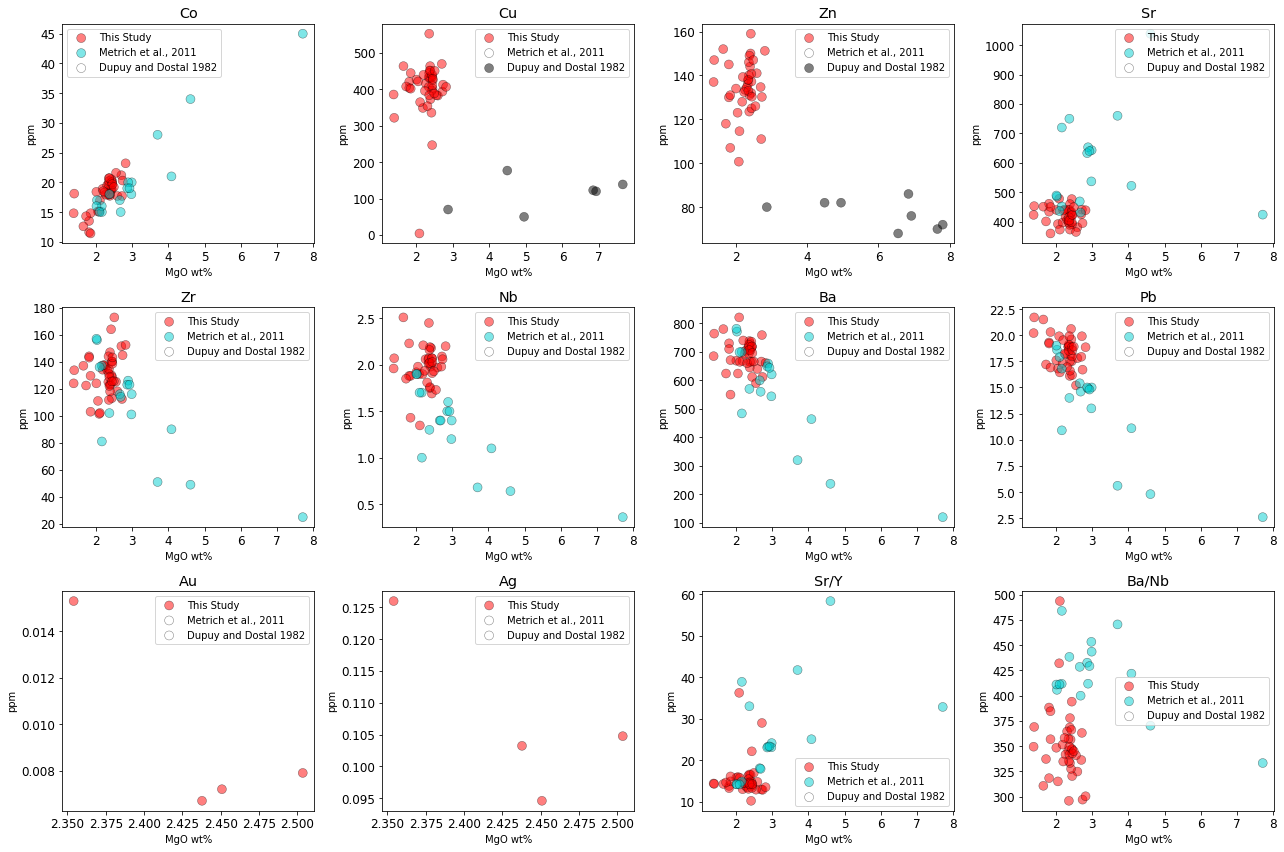

In [79]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(18)

category = ['Co','Cu','Zn', 'Sr', 'Zr', 'Nb',  'Ba', 'Pb', 'Au', 'Ag', 'Sr/Y', 'Ba/Nb']

subcat = all_yas_dat_slice['Author'].unique()
numbers = list(range(1,21))
sub = zip(category, numbers)
samp_color = dict(zip(subcat, ['red','darkturquoise', 'black']))
print(samp_color)
for c,num in sub:
    df_metal = all_yas_dat_slice[all_yas_dat_slice.metal ==c]
    ax = fig.add_subplot(3,4,num)
    for i in subcat:
        df_subcat = df_metal[df_metal['Author'] == i]
        x = df_subcat['MgO']
        y = df_subcat['ppm']
        #print(df_subcat[['Author','metal','ppm','MgO']])
        ax.scatter(x, y, c=df_subcat['Author'].map(samp_color),marker='o',s=80,alpha=0.5, linewidths=0.5, edgecolors='black', label =i)
        ax.set_title(c)
        
        ax.set_xlabel('MgO wt%', fontsize=10)
        ax.set_ylabel('ppm', fontsize=10)
        ax.legend(fontsize = 10)
        
plt.tight_layout()


## Export data

In [80]:
# my data
